# 6.3: Geographical Visualizations with Python

## Content

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for all countries in the world 
country_geo = r'C:\Users\ThinkPad T570\Documents\05-2024 OpenData WorldRealEstate Analysis_LazerHF/02 Data/Original Data/world-countries.json'

In [4]:
# folder path to main project folder
path = r'C:\Users\ThinkPad T570\Documents\05-2024 OpenData WorldRealEstate Analysis_LazerHF'

In [5]:
# importing prepared World Real Estate dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.csv'))

In [6]:
df.head()

,Unnamed: 0,Title,Country,Location,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent,C-Code,Price_category,Time_Period
0,1,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007,2,3,5,245,274415.0,Europe,5,Middle price,2000-2010
1,4,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023,4,2,4,54,314990.0,Europe,5,Middle price,2010on
2,6,"3 room apartment 72 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",1955,4,4,3,72,122000.0,Europe,5,Middle price,1950-2000
3,7,"3 room apartment 100 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",2013,16,2,3,100,159000.0,Europe,5,Middle price,2010on
4,16,"1 room apartment 55 m² in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2021,6,2,2,55,314122.0,Europe,5,Middle price,2010on


In [7]:
# drop column
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.shape

(15794, 13)

## 02. Data Wrangling

In [9]:
df.columns

Index(['Title', 'Country', 'Location', 'Year', 'Total_Floors', 'Apart_Floors',
       'Apart_Rooms', 'Total_Area', 'Price', 'Continent', 'C-Code',
       'Price_category', 'Time_Period'],
      dtype='object')

In [10]:
# Select only the necessary columns and put them in a list called columns

columns = ['Title', 'Country', 'Year', 'Total_Floors', 'Apart_Floors',
       'Apart_Rooms', 'Total_Area', 'Price', 'Continent', 'C-Code',
       'Price_category', 'Time_Period']

In [11]:
# Create a subset
df_sub = df[columns]

In [12]:
df_sub.head()

,Title,Country,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent,C-Code,Price_category,Time_Period
0,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,2007,2,3,5,245,274415.0,Europe,5,Middle price,2000-2010
1,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,2023,4,2,4,54,314990.0,Europe,5,Middle price,2010on
2,"3 room apartment 72 m² in Minsk, Belarus",Belarus,1955,4,4,3,72,122000.0,Europe,5,Middle price,1950-2000
3,"3 room apartment 100 m² in Minsk, Belarus",Belarus,2013,16,2,3,100,159000.0,Europe,5,Middle price,2010on
4,"1 room apartment 55 m² in Akarca, Turkey",Turkey,2021,6,2,2,55,314122.0,Europe,5,Middle price,2010on


In [13]:
# Check for missing values
df_sub.isnull().sum()

Title             0
Country           0
Year              0
Total_Floors      0
Apart_Floors      0
Apart_Rooms       0
Total_Area        0
Price             0
Continent         0
C-Code            0
Price_category    0
Time_Period       0
dtype: int64

In [14]:
df_sub.dtypes

Title              object
Country            object
Year                int64
Total_Floors        int64
Apart_Floors        int64
Apart_Rooms         int64
Total_Area          int64
Price             float64
Continent          object
C-Code              int64
Price_category     object
Time_Period        object
dtype: object

In [15]:
# counting real estate transactions in specific countries
df['Country'].nunique()

24

In [16]:
df['Country'].value_counts()

Country
Belarus            7753
Turkey             2013
Russia             1697
Lithuania          1002
Greece              932
Georgia             771
Uzbekistan          466
Croatia             332
Northern Cyprus     203
Montenegro          123
Thailand            122
Spain                99
UAE                  94
Portugal             66
Indonesia            37
Poland               22
Serbia               12
Czech Republic       11
Cyprus               10
Italy                 9
Latvia                8
Austria               7
Hungary               3
Finland               2
Name: count, dtype: int64

In [17]:
df['Continent'].value_counts()

Continent
Europe    12607
Asia       3093
Africa       94
Name: count, dtype: int64

In [18]:
df['Price_category'].value_counts()

Price_category
Low price       9265
Middle price    6110
High price       419
Name: count, dtype: int64

In [19]:
df['Time_Period'].value_counts()

Time_Period
2010on       9533
1950-2000    4736
2000-2010    1143
1900-1950     342
1850-1900      36
1800-1850       4
Name: count, dtype: int64

### Creating Location Dataframe

In [20]:
# Select only the states from state_rec in a new subset
df_countries = df[["Country"]]

In [21]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure

s2 = df_countries.idxmax(axis=1)

# You have not encountered Series yet, but it is another pandas data structure. It is similar to a dataframe, but it is 
# one-dimensional - this means it can only have one column, whereas a dataframe is two dimensional. You can turn any dataframe
# column into series and you can add series to a dataframe as a column!

In [22]:
s2

0        Country
1        Country
2        Country
3        Country
4        Country
          ...   
15789    Country
15790    Country
15791    Country
15792    Country
15793    Country
Length: 15794, dtype: object

In [23]:
# create a sub df showcasting price category per state
df_country_records = df_sub.groupby(['Country','Price_category']).size().unstack(fill_value=0).reset_index()

In [25]:
df_country_records.head(30)

Price_category,Country,High price,Low price,Middle price
0,Austria,3,0,4
1,Belarus,18,6691,1044
2,Croatia,35,3,294
3,Cyprus,0,2,8
4,Czech Republic,2,0,9
5,Finland,1,0,1
6,Georgia,8,565,198
7,Greece,87,123,722
8,Hungary,0,0,3
9,Indonesia,4,0,33


In [30]:
# create a sub df showcasting construction periods per state
df_country_timespan = df_sub.groupby(['Country','Time_Period']).size().unstack(fill_value=0).reset_index()

In [31]:
df_country_timespan

Time_Period,Country,1800-1850,1850-1900,1900-1950,1950-2000,2000-2010,2010on
0,Austria,0,0,0,0,0,7
1,Belarus,0,5,178,3603,629,3338
2,Croatia,1,10,35,78,57,151
3,Cyprus,0,0,0,0,0,10
4,Czech Republic,0,0,0,0,0,11
5,Finland,0,0,0,1,0,1
6,Georgia,0,0,0,1,0,770
7,Greece,0,0,0,466,252,214
8,Hungary,0,1,1,0,0,1
9,Indonesia,0,0,0,0,0,37


In [34]:
# Select only the states from state_rec in a new subset
df_countries_adapted = df_country_records[["Country"]]

In [35]:
s2_adapted = df_countries_adapted.idxmax(axis=1)

In [36]:
s2_adapted

0     Country
1     Country
2     Country
3     Country
4     Country
5     Country
6     Country
7     Country
8     Country
9     Country
10    Country
11    Country
12    Country
13    Country
14    Country
15    Country
16    Country
17    Country
18    Country
19    Country
20    Country
21    Country
22    Country
23    Country
dtype: object

In [37]:
type(s2_adapted)

pandas.core.series.Series

In [56]:
# create a sub df showcasting transactions per state
# df_country_transactions = df_sub.groupby(['Country','Price']).value.counts().unstack(fill_value=0).reset_index()
# df_country_transactions = df_sub.groupby(['Country', 'Price']).sum().reset_index()
# df_country_transactions = df_sub.groupby(['Country', 'Price'])['Price'].sum()
df_country_transactions = df_sub.groupby(['Country'], sort=True)['Price'].size()

In [65]:
df_country_transactions

Country
Austria               7
Belarus            7753
Croatia             332
Cyprus               10
Czech Republic       11
Finland               2
Georgia             771
Greece              932
Hungary               3
Indonesia            37
Italy                 9
Latvia                8
Lithuania          1002
Montenegro          123
Northern Cyprus     203
Poland               22
Portugal             66
Russia             1697
Serbia               12
Spain                99
Thailand            122
Turkey             2013
UAE                  94
Uzbekistan          466
Name: Price, dtype: int64

## 03. Data Cleaning

In [59]:
# Check how many extreme values

df_sub[df_sub['Price'] >1000000]

,Title,Country,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent,C-Code,Price_category,Time_Period
453,"3 room apartment 170 m² in Bodrum, Turkey",Turkey,2022,2,2,4,170,1902124.0,Europe,5,High price,2010on
455,Penthouse 3 bedrooms 128 m² in Cihangir Mahall...,Turkey,2018,4,4,4,128,1190186.0,Europe,5,High price,2010on
456,"4 room apartment 183 m² in Marmara Region, Turkey",Turkey,2023,18,10,5,183,1005409.0,Europe,5,High price,2010on
458,"Condo 4 bedrooms 278 m² in Ueskuedar, Turkey",Turkey,2020,12,8,5,278,1600000.0,Europe,5,High price,2010on
459,Penthouse 5 bedrooms 444 m² in Goektuerk Merke...,Turkey,2021,6,5,6,444,2603193.0,Europe,5,High price,2010on
...,...,...,...,...,...,...,...,...,...,...,...,...
15328,"3 room apartment 187 m² in Lisbon, Portugal",Portugal,2021,5,4,4,187,1423279.0,Europe,5,High price,2010on
15331,"3 room apartment 185 m² in Lisbon, Portugal",Portugal,2021,7,7,4,185,1099817.0,Europe,5,High price,2010on
15341,3 room apartment 220 m² in Cedofeita Santo Ild...,Portugal,2023,6,4,4,220,1092776.0,Europe,5,High price,2010on
15349,"4 room apartment 267 m² in Malaga, Spain",Spain,2023,20,16,5,267,2174987.0,Europe,5,High price,2010on


In [61]:
df_price_sub = df_sub[df_sub['Price'] < 1000000]

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

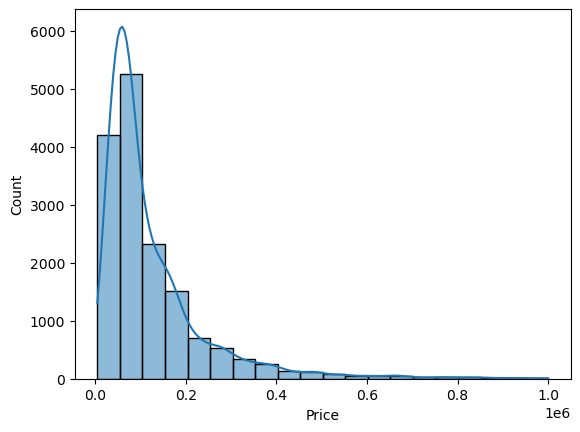

In [63]:
sns.histplot(df_price_sub['Price'], bins=20, kde = True) # shows extreme values for 'Price'

## 04. Ploting a Choropleth

In [66]:
# Create a data frame with just the countries and the transaction records I want plotted

data_to_plot = df_country_transactions[['Country','']]

KeyError: "None of [Index(['Country', ''], dtype='object', name='Country')] are in the [index]"

In [ ]:
data_to_plot.head()

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Country', '?'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Transaction Records").add_to(map)
folium.LayerControl().add_to(map)

map

### Export

In [ ]:
# export map:
map.save(os.path.join(path, '02 Data','Prepared Data', 'map_transaction_records.html'))